In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
%matplotlib inline

In [2]:
root_path = "/Users/courtneywhalen/Documents/Masters/CSE6250/project/"

In [3]:
train_df = pd.read_csv(root_path + "CheXpert-v1.0-small/train.csv")
train_df[['patientID','study']]=train_df['Path'].str.split('/', expand=True)[[2,3]]

valid_df = pd.read_csv(root_path + "CheXpert-v1.0-small/valid.csv")
valid_df[['patientID','study']]=valid_df['Path'].str.split('/', expand=True)[[2,3]]

In [4]:
# analyze by patientID
train_studies = train_df[['patientID','study']].groupby('patientID').count()['study'].values
valid_studies = valid_df[['patientID','study']].groupby('patientID').count()['study'].values

Train set:
Min of studies: 1 ; Max of studies: 92


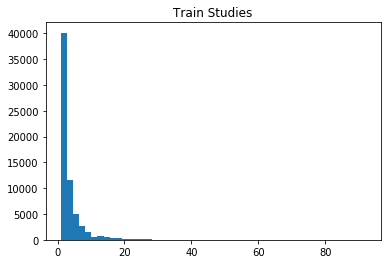

Valid set:
Min of studies: 1 ; Max of studies: 3


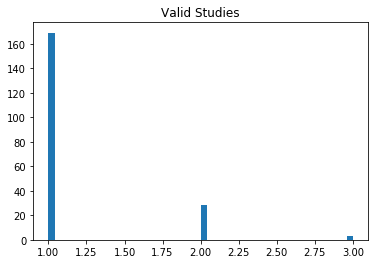

In [5]:
print('\033[1mTrain set:\033[0m')
print("Min of studies:", min(train_studies), "; Max of studies:", max(train_studies))

plt.hist(train_studies, bins=50)
plt.title("Train Studies")
plt.show()

print('\033[1mValid set:\033[0m')
print("Min of studies:", min(valid_studies), "; Max of studies:", max(valid_studies))

plt.hist(valid_studies, bins=50)
plt.title("Valid Studies")
plt.show()

In [6]:
print("Train size:", len(train_df))
print("Valid size:", len(valid_df))
print("Patients in Training:",train_df['patientID'].unique().size)
print("Patients in Validation:",valid_df['patientID'].unique().size)
print("Total Patients:",train_df['patientID'].unique().size+valid_df['patientID'].unique().size)

Train size: 223414
Valid size: 234
Patients in Training: 64540
Patients in Validation: 200
Total Patients: 64740


### Initial Stats
- distribution of positive/negative/uncertain for each target class

In [7]:
columns =["Sex","Frontal/Lateral","AP/PA"]
for c in columns:
    print("\n---- %s ----" % c)
    print(train_df[c].value_counts())


---- Sex ----
Male       132636
Female      90777
Unknown         1
Name: Sex, dtype: int64

---- Frontal/Lateral ----
Frontal    191027
Lateral     32387
Name: Frontal/Lateral, dtype: int64

---- AP/PA ----
AP    161590
PA     29420
LL        16
RL         1
Name: AP/PA, dtype: int64


In [8]:
columns =["No Finding","Enlarged Cardiomediastinum","Cardiomegaly","Lung Opacity",
          "Lung Lesion","Edema","Consolidation","Pneumonia","Atelectasis","Pneumothorax","Pleural Effusion",
          "Pleural Other","Fracture","Support Devices"]
df1=train_df[['patientID',"No Finding","Enlarged Cardiomediastinum","Cardiomegaly","Lung Opacity",
          "Lung Lesion","Edema","Consolidation","Pneumonia","Atelectasis","Pneumothorax","Pleural Effusion",
          "Pleural Other","Fracture","Support Devices"]].drop_duplicates()
df2=valid_df[['patientID',"No Finding","Enlarged Cardiomediastinum","Cardiomegaly","Lung Opacity",
          "Lung Lesion","Edema","Consolidation","Pneumonia","Atelectasis","Pneumothorax","Pleural Effusion",
          "Pleural Other","Fracture","Support Devices"]].drop_duplicates()

df_new = pd.concat([df1, df2])
for c in columns:
    print("\n---- %s ----" % c)
    print(df_new[c].value_counts())


---- No Finding ----
1.0    15901
0.0      174
Name: No Finding, dtype: int64

---- Enlarged Cardiomediastinum ----
 0.0    14834
-1.0     9748
 1.0     8729
Name: Enlarged Cardiomediastinum, dtype: int64

---- Cardiomegaly ----
 1.0    21097
 0.0     7662
-1.0     6372
Name: Cardiomegaly, dtype: int64

---- Lung Opacity ----
 1.0    82252
 0.0     4914
-1.0     4245
Name: Lung Opacity, dtype: int64

---- Lung Lesion ----
 1.0    6531
-1.0    1049
 0.0     945
Name: Lung Lesion, dtype: int64

---- Edema ----
 1.0    42584
 0.0    15416
-1.0    10935
Name: Edema, dtype: int64

---- Consolidation ----
-1.0    22372
 0.0    19029
 1.0    11828
Name: Consolidation, dtype: int64

---- Pneumonia ----
-1.0    14825
 1.0     4412
 0.0     2000
Name: Pneumonia, dtype: int64

---- Atelectasis ----
-1.0    27523
 1.0    27222
 0.0     1113
Name: Atelectasis, dtype: int64

---- Pneumothorax ----
 0.0    44221
 1.0    14191
-1.0     2540
Name: Pneumothorax, dtype: int64

---- Pleural Effusion ----

### Shape of Training Images
- paper crops images to 320x320, look at distribution of image height/widths to see if okay 

In [9]:
train_heights = []
train_widths = []

for idx, row in train_df.iterrows():
    if(idx % 10000 == 0):
        print(idx)
    img = cv2.imread(root_path + row.Path, cv2.IMREAD_GRAYSCALE)
    height, width = img.shape
    train_heights.append(height)
    train_widths.append(width)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000


Train set:
Min of heights: 320 ; Max of heights: 642
Min of widths: 320 ; Max of widths: 930


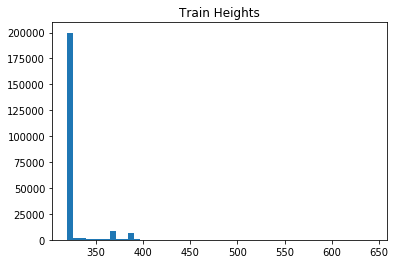

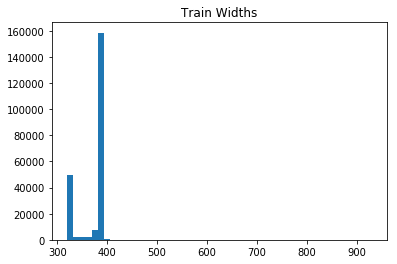

In [10]:
print('\033[1mTrain set:\033[0m')
print("Min of heights:", min(train_heights), "; Max of heights:", max(train_heights))
print("Min of widths:", min(train_widths), "; Max of widths:", max(train_widths))

plt.hist(train_heights, bins=50)
plt.title("Train Heights")
plt.show()

plt.hist(train_widths, bins=50)
plt.title("Train Widths")
plt.show()

In [11]:
len([t for t in train_heights if t > 400])

967

In [12]:
len([t for t in train_widths if t > 400])

789